In [7]:
#QUESTION no 2

import numpy as np

def findAns(arr):
    cond_list = [s for s in arr if len(s) > 5]
#     print(cond_list)
    if cond_list:
        return max(cond_list, key=len)
    return min(arr, key=len)

arr = np.array(["car", "animal", "gorilla"])
print(findAns(arr))


gorilla


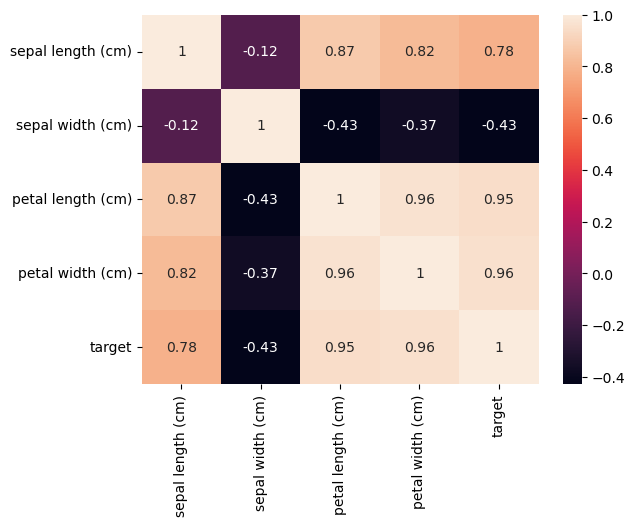

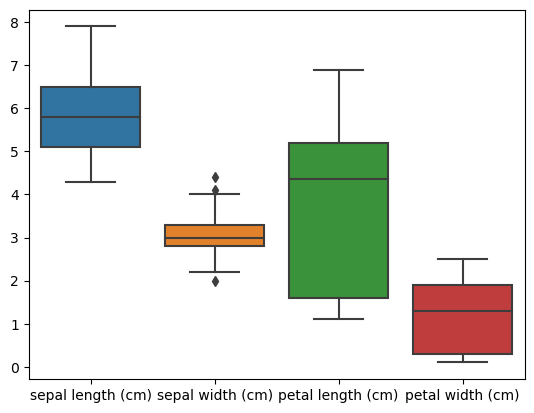

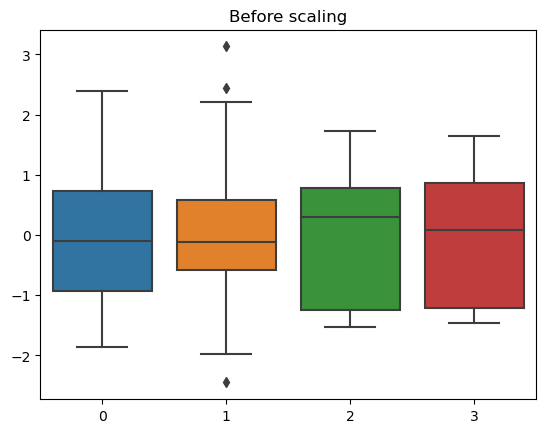

Cross-validation scores: [0.91666667 0.91666667 1.         1.         0.91666667]
Mean accuracy: 0.95
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


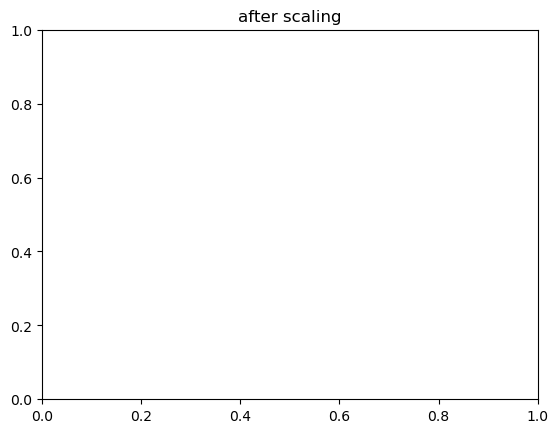

In [85]:
#Question no 1

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

data = load_iris()
# print(data)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# print(df.head(10).to_string())

summary = df.describe()
# print("\n\nSummary of the dataset:\n", summary.to_string())

# for col in df.columns[:-1]:
#     print(f"{col} - Min: {df[col].min()}, Max: {df[col].max()}")

sns.heatmap(df.corr(), annot=True)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sns.boxplot(data=X_train)
plt.show()
plt.title("Before scaling")
sns.boxplot(data=X_train_scaled)
plt.show()
plt.title("after scaling")

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

scores = cross_val_score(LogisticRegression(max_iter=200), X_train_scaled, y_train)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
